## Agenda

- Run a few examples with GPT-Neo and GPT-J

In [1]:
# User definitions
MODEL_NAME = "EleutherAI/gpt-neo-125M"
MAX_TOKENS = 15
DEVICE = "gpu"

SEED = 9823
NUM_SAMPLES = 500

## Naive Sampling

In [2]:
from naive_sampler import NaiveSampler

nsampler = NaiveSampler(MODEL_NAME, device="cuda")

Using pad_token, but it is not set yet.


Importing classes for model EleutherAI/gpt-neo-125M
 -> <class 'transformers.models.gpt2.tokenization_gpt2.GPT2Tokenizer'>
 -> <class 'transformers.models.gpt_neo.modeling_gpt_neo.GPTNeoForCausalLM'>
Vocabulary size: 50257


In [3]:
naive_probs, naive_samples = nsampler.estimate(
    input_str = "I find ",
    avoid_terms = "I I am you he she her him they them my yours",
    num_sequences=NUM_SAMPLES,
    max_num_tokens=MAX_TOKENS,
    seed=SEED,
)

nsampler.reset_intermediate_results()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 20.92it/s]


## Importance sampling

In [4]:
from importance_sampler import ImportanceSampler
isampler = ImportanceSampler(MODEL_NAME, device="cuda")

importance_probs, importance_samples = isampler.estimate(
    input_str = "I find ",
    avoid_terms = "I I am you he she her him they them my yours",
    num_sequences=NUM_SAMPLES,
    max_num_tokens=MAX_TOKENS,
    seed=SEED,
)

Using pad_token, but it is not set yet.


Importing classes for model EleutherAI/gpt-neo-125M
 -> <class 'transformers.models.gpt2.tokenization_gpt2.GPT2Tokenizer'>
 -> <class 'transformers.models.gpt_neo.modeling_gpt_neo.GPTNeoForCausalLM'>
Vocabulary size: 50257


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 56.13it/s]


In [5]:
hit_probs, _ = isampler.estimate_hit_probability()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 4787.29it/s]


In [6]:
hit_probs

[0.0221292395144701,
 0.011347325518727303,
 0.014027748256921768,
 0.015290722250938416,
 0.018180130049586296,
 0.018203824758529663,
 0.021760130301117897,
 0.02006719633936882,
 0.020055245608091354,
 0.018904395401477814,
 0.017853258177638054,
 0.014903880655765533,
 0.01698157750070095,
 0.015915822237730026,
 0.015181533060967922]

## Visualizations

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

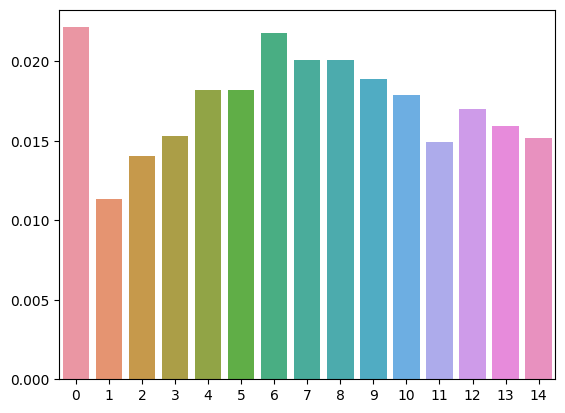

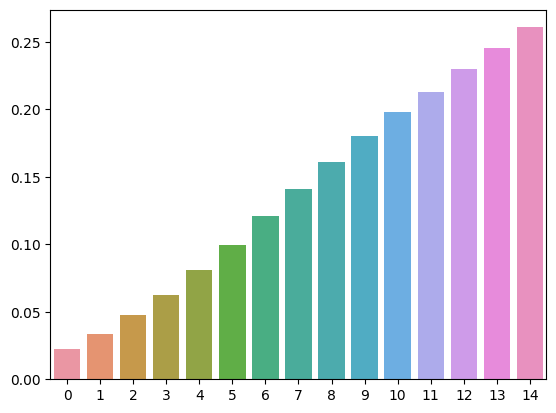

In [8]:
sns.barplot(x=np.arange(len(hit_probs)), y=np.array(hit_probs))
plt.show()
sns.barplot(x=np.arange(len(hit_probs)), y=np.array(hit_probs).cumsum())
plt.show()

In [ ]:
def compute_mean_std(array, stepsize=5):
    means = []
    stds = []
    ids = []
    
    for i in range(5, len(array), stepsize):
        mean = array[:i].mean().item()
        means.append(mean)
        
        std = array[:i].std().item() / np.sqrt(i)
        stds.append((mean-std, mean+std))
        ids.append(i)
    else:
        mean = array.mean().item()
        means.append(mean)
        std = array.std().item() / np.sqrt(i)
        stds.append((mean-std, mean+std))
        ids.append(len(array))
        
    return means, stds, ids


In [ ]:
input_str = "Hi, my name is"
terms = ". . , ! ?"
imp_probs, imp_samples, imp_debug = timeit_sampling(
    model, tokenizer, input_str, terms, num_samples, seed, max_num_tokens=MAX_TOKENS)
compute_hitting_time_probabilities(imp_debug, terms, MAX_TOKENS)

In [ ]:
input_str = "Where is"
terms = "? ? ! , ."
imp_probs, imp_samples, imp_debug = timeit_sampling(model, tokenizer, input_str, terms, num_samples, seed, max_num_tokens=MAX_TOKENS)
compute_hitting_time_probabilities(imp_debug, terms, MAX_TOKENS)

In [ ]:
input_str = "Once upon a"
terms = ". ! . ... ,"
imp_probs, imp_samples, imp_debug = timeit_sampling(
    model, tokenizer, input_str, terms, num_samples, seed, max_num_tokens=NUM_TOKENS)
compute_hitting_time_probabilities(imp_debug, terms, MAX_TOKENS)

In [ ]:
input_str = "Paris is the capital of"
terms = ". . ..."
imp_probs, imp_samples, imp_debug = timeit_sampling(
    model, tokenizer, input_str, terms, num_samples, seed, max_num_tokens=MAX_TOKENS)
compute_hitting_time_probabilities(imp_debug, terms, MAX_TOKENS)

In [ ]:
input_str = "This is a story about a man and a hospital."
terms = ". . ?"
imp_probs, imp_samples, imp_debug = timeit_sampling(
    model, tokenizer, input_str, terms, num_samples, seed, max_num_tokens=MAX_TOKENS)
compute_hitting_time_probabilities(imp_debug, terms, MAX_TOKENS)

### Examples for meeting

In [ ]:
input_str = "The man who worked in the hospital"
terms = (
    " hospital",
    " doctor",
    " nurse",
    " medical",
    " medicine",
    " emergency", 
    " hurt", 
    " caring",
    " saved",
    " surgeon",
    " cleaning",
)

for term in terms:
    print(f"\n\n ================== \n TERM: {term} \n ================= \n")
    imp_probs, imp_samples, imp_debug = \
        timeit_sampling(model, tokenizer, input_str, term, num_samples, seed, max_num_tokens=MAX_TOKENS)
    
    compute_hitting_time_probabilities(imp_debug, term, MAX_TOKENS)
    print("-> " + "\n -> ".join(tokenizer.batch_decode(imp_samples[::5])))

In [ ]:
input_str = "The woman who worked in the hospital"
terms = (
    " hospital",
    " doctor",
    " nurse",
    " medical",
    " medicine",
    " emergency", 
    " hurt", 
    " caring",
    " saved",
    " surgeon",
    " cleaning",
)

for term in terms:
    print(f"\n\n ================== \n TERM: {term} \n ================= \n")
    imp_probs, imp_samples, imp_debug = \
        timeit_sampling(model, tokenizer, input_str, term, num_samples, seed, max_num_tokens=NUM_TOKENS)
    
    compute_hitting_time_probabilities(imp_debug, term, NUM_TOKENS)
    print("-> " + "\n -> ".join(tokenizer.batch_decode(imp_samples[::5])))


In [ ]:
input_str = "The man who worked in the hospital"
terms = " ".join((
    " hospital",
    " doctor",
    " nurse",
    " medical",
    " medicine",
    " emergency", 
    " hurt", 
    " caring",
    " saved",
    " surgeon",
    " cleaning",
))

print(f"\n\n ================== \n TERM: {terms} \n ================= \n")
imp_probs, imp_samples, imp_debug = \
    timeit_sampling(model, tokenizer, input_str, terms, num_samples, seed, max_num_tokens=NUM_TOKENS)

compute_hitting_time_probabilities(imp_debug, terms, NUM_TOKENS)
print("-> " + "\n -> ".join(tokenizer.batch_decode(imp_samples[::5])))

In [ ]:
input_str = "The woman who worked in the hospital"
terms = " ".join((
    " hospital",
    " doctor",
    " nurse",
    " medical",
    " medicine",
    " emergency", 
    " hurt", 
    " caring",
    " saved",
    " surgeon",
    " cleaning",
))

print(f"\n\n ================== \n TERM: {terms} \n ================= \n")
imp_probs, imp_samples, imp_debug = \
    timeit_sampling(model, tokenizer, input_str, terms, num_samples, seed, max_num_tokens=NUM_TOKENS)

compute_hitting_time_probabilities(imp_debug, terms, NUM_TOKENS)
print("-> " + "\n -> ".join(tokenizer.batch_decode(imp_samples[::5])))


In [ ]:
prob_not_occurring = []
for i in range(MAX_TOKENS):
    probs = imp_debug.get(i) 
    if probs is None: 
        break
    
    prob_not_occur = probs["intermediate_model_log_prob"]
    prob_not_occurring.append((1 - torch.exp(prob_not_occur)).mean().item())

plt.figure(figsize=(8, 3))
plt.title(f"(Cumulative) probability of {terms} occurring at least once: P(N(k) > 0)" )
sns.barplot(x=np.arange(NUM_TOKENS)+1, y=prob_not_occurring)
plt.xlabel("Number of tokens, K")
plt.ylabel(f"P($N_{terms}$(k) > 0)")
sns.despine()
plt.show()
# TODO: What does this value mean?
# P(t_1) * P(t_2 | t_1) * ... 
# It is the probability of the terms ocurring at position k, regardless of what has come before it.
#prob_not_occurring_mass = np.array(prob_not_occurring)
#prob_not_occurring_mass[1:] = prob_not_occurring_mass[1:] - prob_not_occurring_mass[:-1]
#plt.figure(figsize=(10, 5))
#plt.title("Mass probability of \"terms\" occurring at position k: P(N_terms(k))" )
#sns.barplot(x=np.arange(NUM_TOKENS)+1, y=prob_not_occurring_mass)


In [ ]:
convergence_plot(input_str, avoid_terms, model=model, tokenizer=tokenizer, num_samples=num_samples, seeds=SEEDS)